In [1]:
import sys # for automation and parallelization: set manual to false when run by a launcher
manual, scenario = (True, 'base') if 'ipykernel' in sys.argv[0] else (False, sys.argv[1])

# START

In [2]:
import sys
sys.path.insert(0, r'../../../quetzal')
import zipfile
from quetzal.model import stepmodel, model
import geopandas as gpd
if manual:
    %matplotlib inline
from quetzal.io.gtfs_reader import importer

PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


In [3]:
training_folder = '../../'
input_folder = training_folder + r'inputs/'
gtfs_folder = input_folder  + 'gtfs/'

In [4]:
#quenedi is a network editor developped by Systra, it allows you to change, add or delete transport lines
# to do so you need to go to https://systragroup.github.io/quetzal-network-editor/
# then load the nodes and links of the gtfs folder ( '../../inputs/gtfs') in the requested field of the website


## Exercice 

In [5]:
# When the network is loaded, create a line, delete a line (100110001:1_1) , and add a stop to the line (100110001:1_2) in the network editor,
# to add a line: - use the + button, then give it a name like line_15_1 and a route_type like subway, 
#you can then create the stop one by one, you will need to create one line for each direction, call the second line_15_2
#to add a stop : select the line of  subway 100110001:1_1 using the pencil, then left click
# to add a node (you can change it stop id in  new_node), you can now save
# to delete press on the bin of the line  of  subway 100110001:1_2
# you can now export your new network using export all
# you have now an outpout folder in your download file,  copy past it in '../../inputs/gtfs'

In [6]:
reseau = zipfile.ZipFile(gtfs_folder + r'/output.zip')
links = gpd.read_file(reseau.open('output/links.geojson'))
nodes = gpd.read_file(reseau.open('output/nodes.geojson'))

In [7]:
# using loc and the collumn "trip_id" we can now check if the changes have been done

<AxesSubplot:>

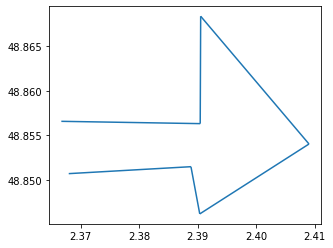

In [13]:
#line added 
links.loc[links["trip_id"]=="line_15_1"].plot()

In [10]:
#node added
nodes.loc[nodes["stop_id"]=="new_node"]

,index,stop_id,stop_name,stop_desc,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,cluster_id,stop_code,geometry
3046,node_sARDyFkRVJfVgBoUebQx1E,new_node,None,None,1,None,0.0,StopArea:59228,NaN,306.0,None,POINT (2.42221 48.84597)


In [11]:
#line deleted
nodes.loc[links["trip_id"]=="100110001:1_2"]

,index,stop_id,stop_name,stop_desc,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,cluster_id,stop_code,geometry


# Export

In [14]:
sm = stepmodel.read_zippedpickles(training_folder + 'model/{scen}/base'.format(scen=scenario))

zones: 100%|█████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 79.41it/s]


In [15]:
sm.links = links
sm.nodes = nodes

In [16]:
sm.to_zippedpickles(training_folder + 'model/{scen}/new_base'.format(scen=scenario))

zones: 100%|█████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 28.00it/s]


In [ ]:
# you can know use the new network in A30_network_integrity

# END